## Mathematical Optimization Series

# Part 5: Newtons method

Intro goes here

In [1]:
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
from mlrefined_libraries import basics_library as baslib
from mlrefined_libraries import calculus_library as callib
from mlrefined_libraries import math_optimization_library as optlib
from mlrefined_libraries import linear_algebra_library as linlib
import autograd.numpy as np
import time

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

# 1. Newton's method

## 1.1  The descent direction provided by second order Taylor series approximation

-reminder of 2nd order Taylor Series

-visualization of descent using second order - adapting the lipschitz visualizer

-computation of the stationary points for single-input and multi-input functions

If we do that, the algorithm itself just falls out.

With all of our coefficients solved we have a degree 2 polynomial that satisfies the three desired criteria 

$$
h(w) = g(w^0) + \frac{\mathrm{d}}{\mathrm{d}w}g(w^0)(w - w^0) +  \frac{1}{2}\frac{\mathrm{d}^2}{\mathrm{d}w^2}g(w^0)(w - w^0)^2
$$

$$
h(\mathbf{w}) = g(\mathbf{w}^0) + \nabla g(\mathbf{w}^0)^T(\mathbf{w} - \mathbf{w}^0) + \frac{1}{2}(\mathbf{w} - \mathbf{w}^0)^T \nabla^2 g\left(\mathbf{w}^0\right) (\mathbf{w} - \mathbf{w}^0)
$$


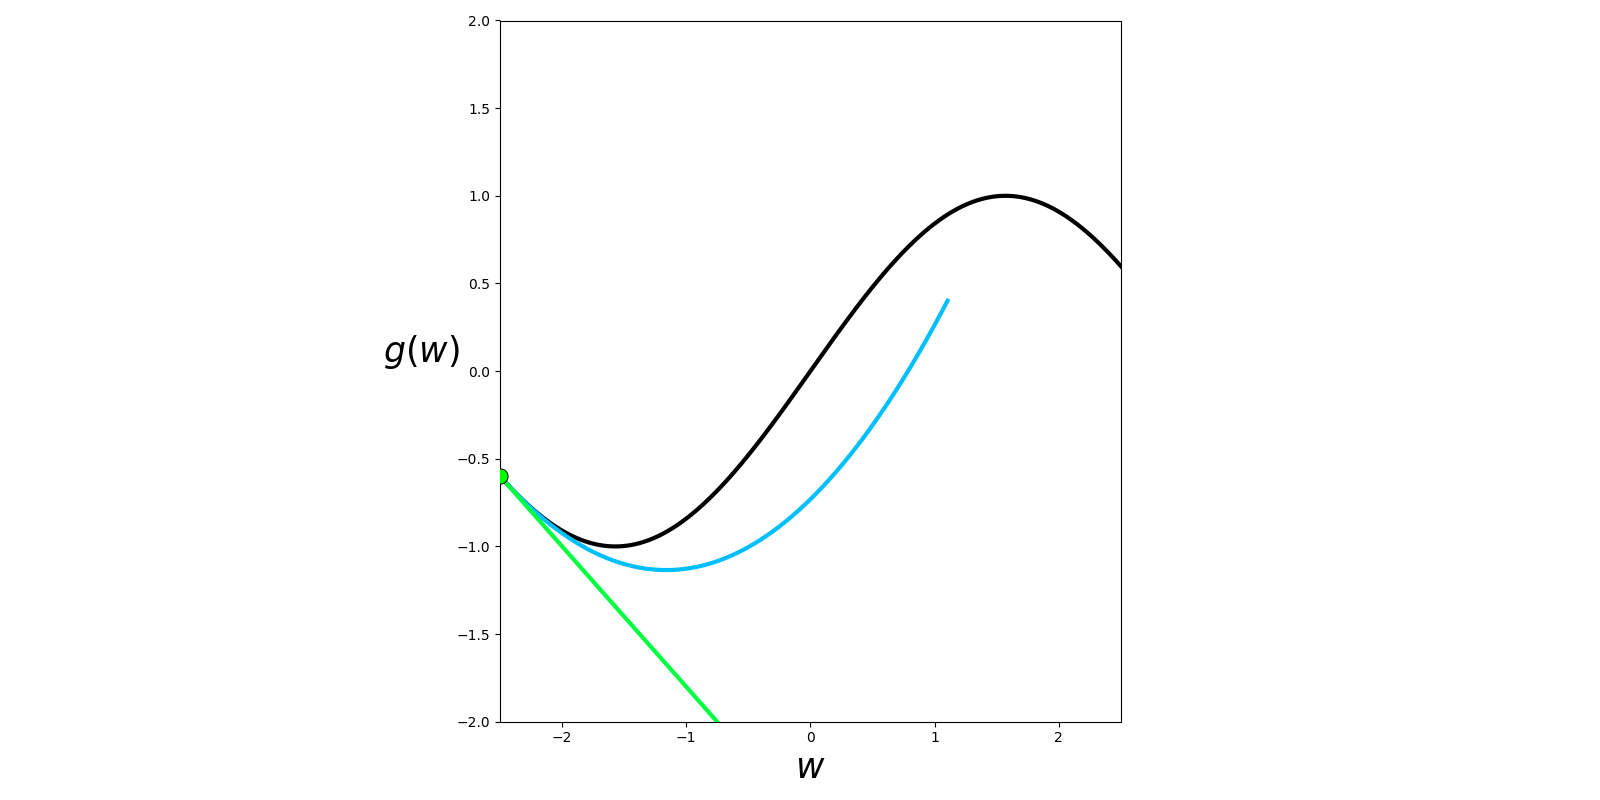
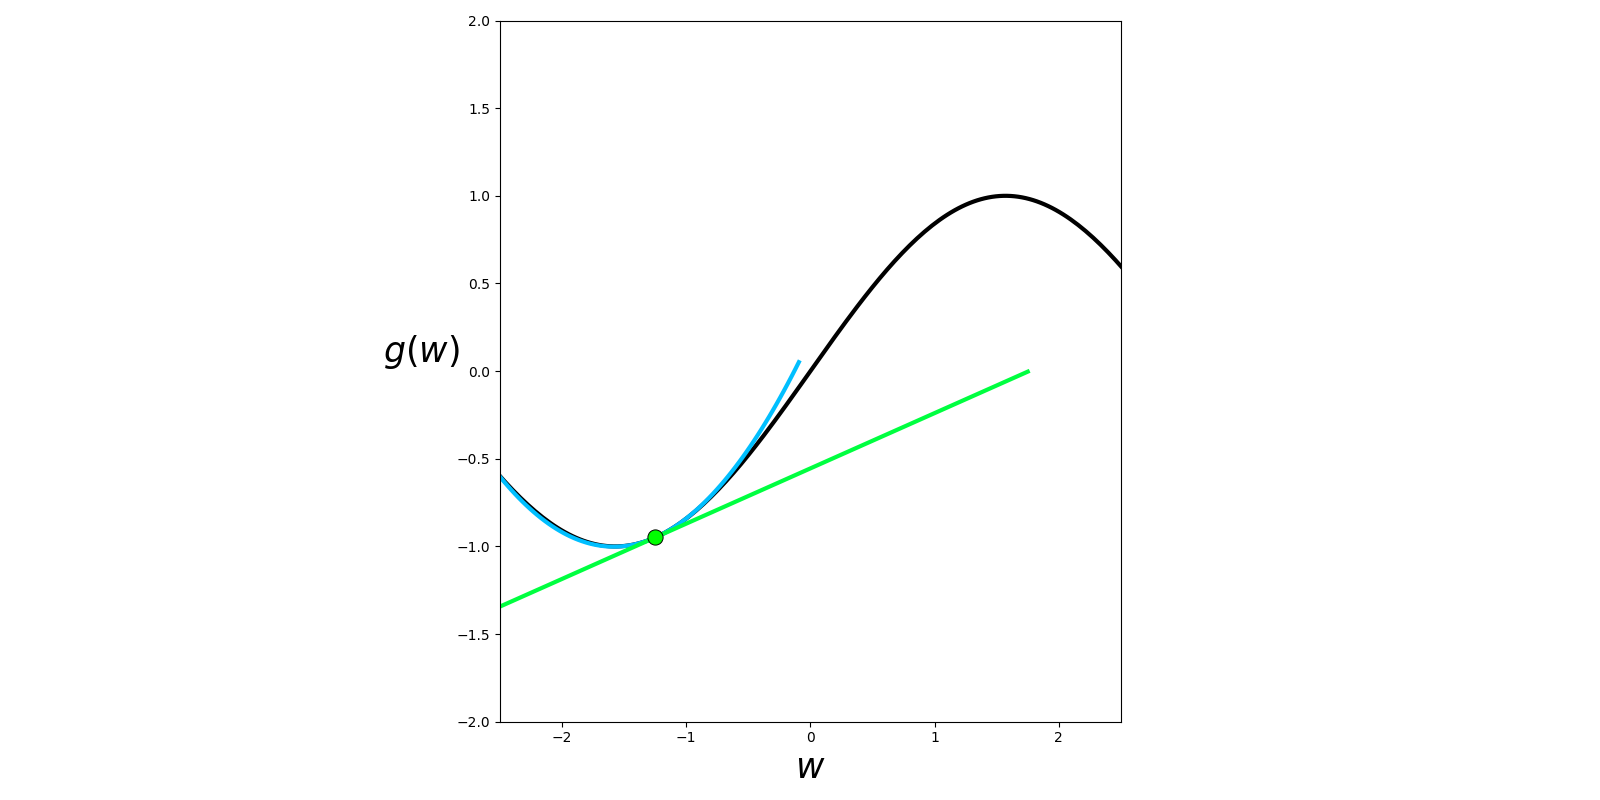
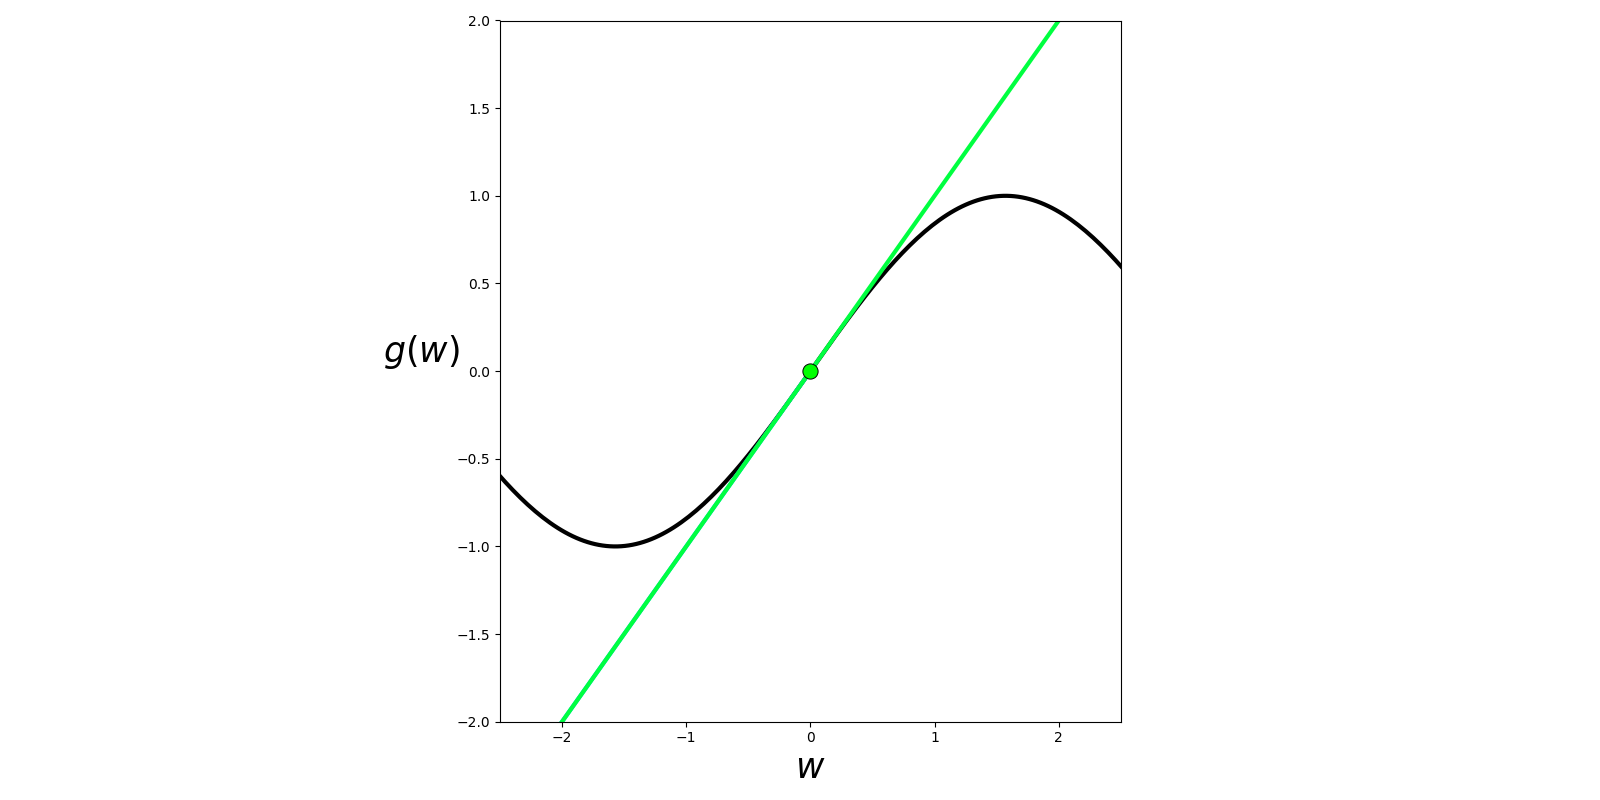
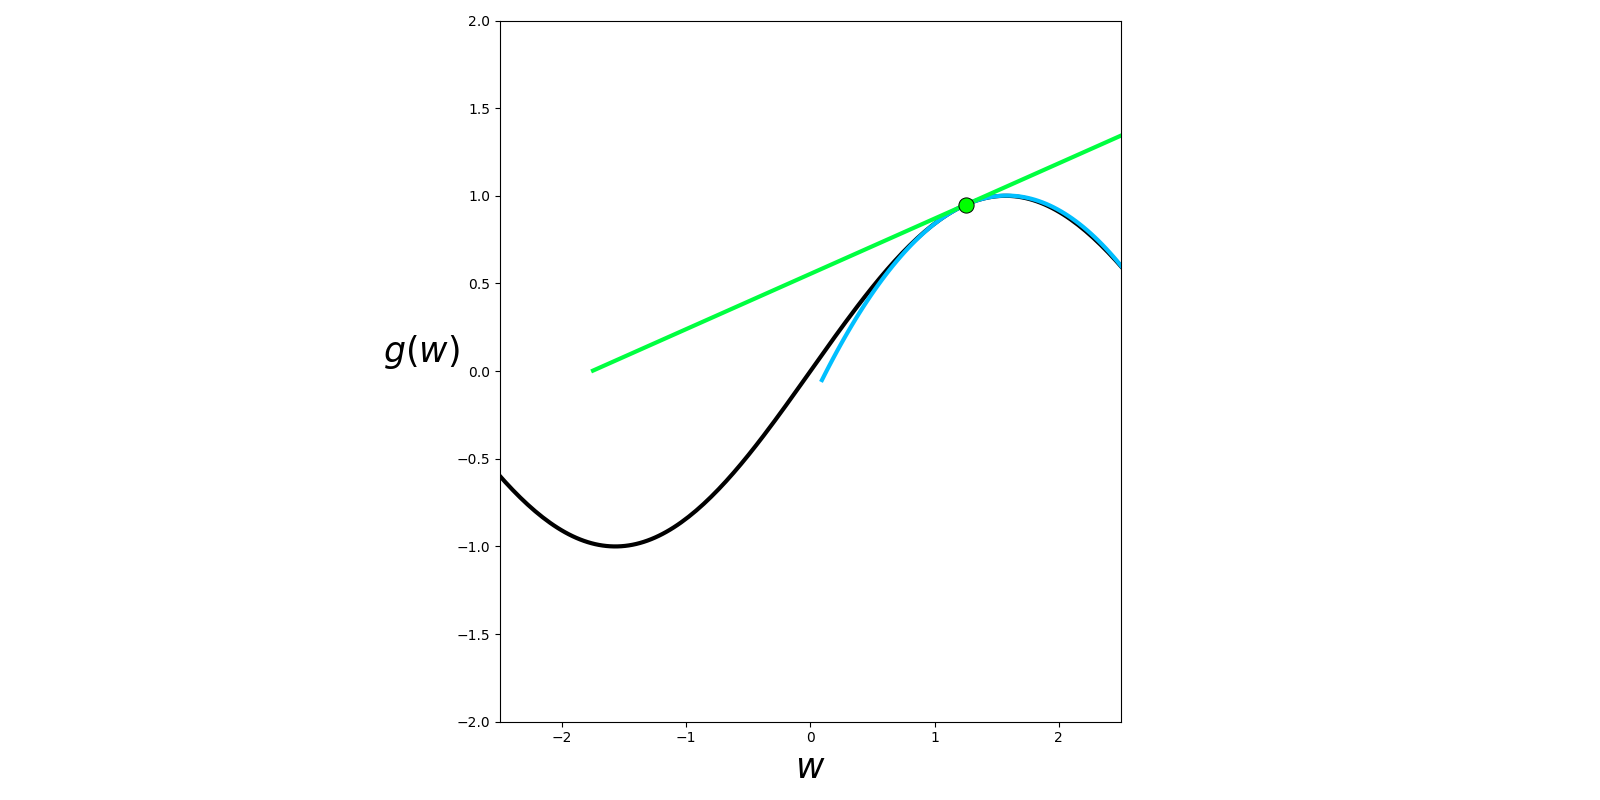
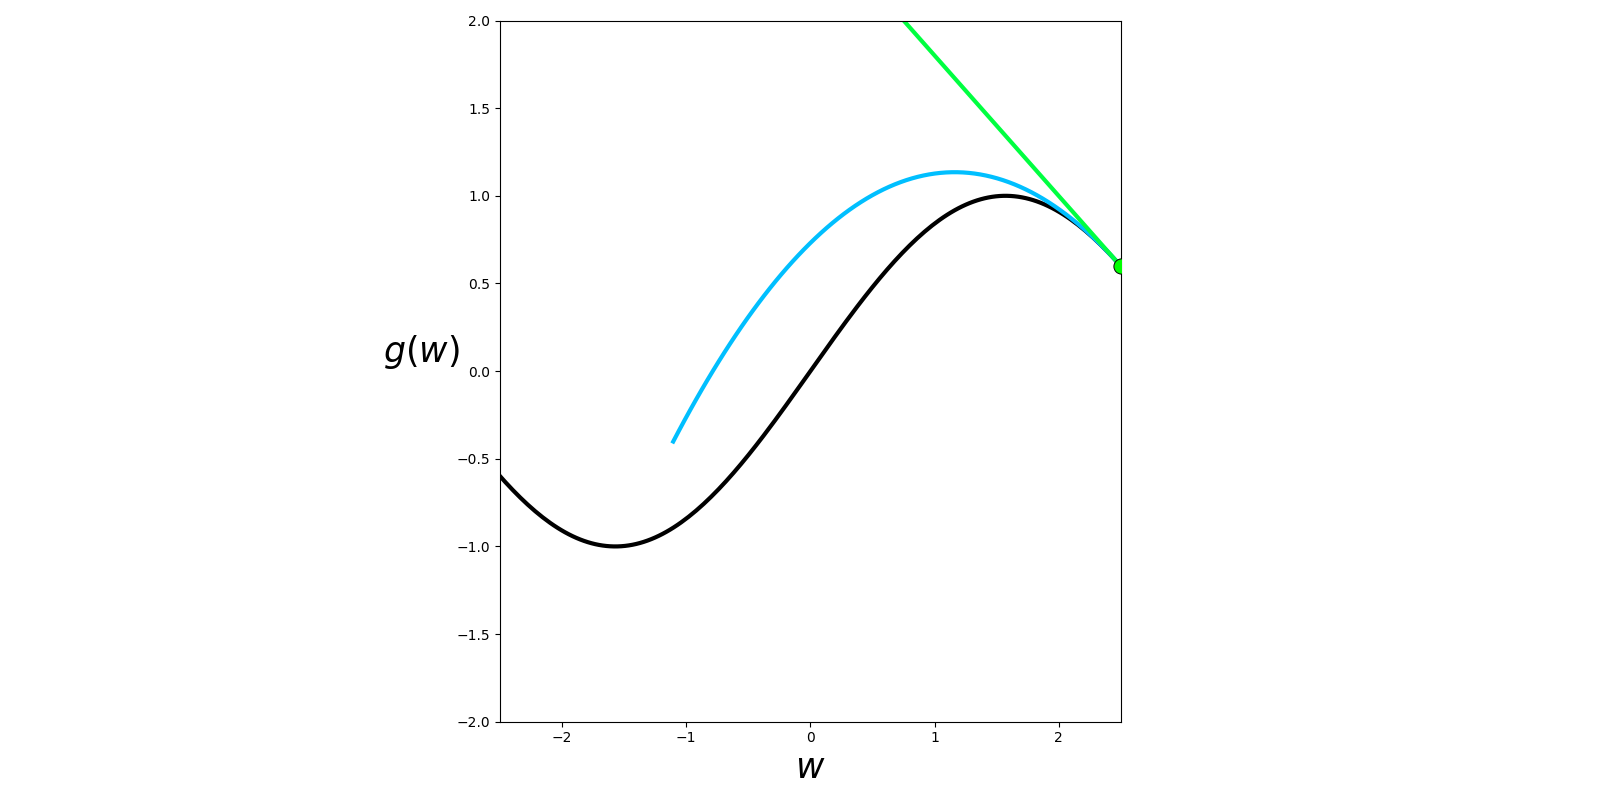

In [8]:
# what function should we play with?  Defined in the next line.
g = lambda w: np.sin(w)

# create an instance of the visualizer with this function 
taylor_viz = callib.taylor2d_viz.visualizer(g = g)

# run the visualizer for our chosen input function
taylor_viz.draw_it(first_order = True,second_order = True,num_frames = 5)

<IPython.core.display.Javascript object>


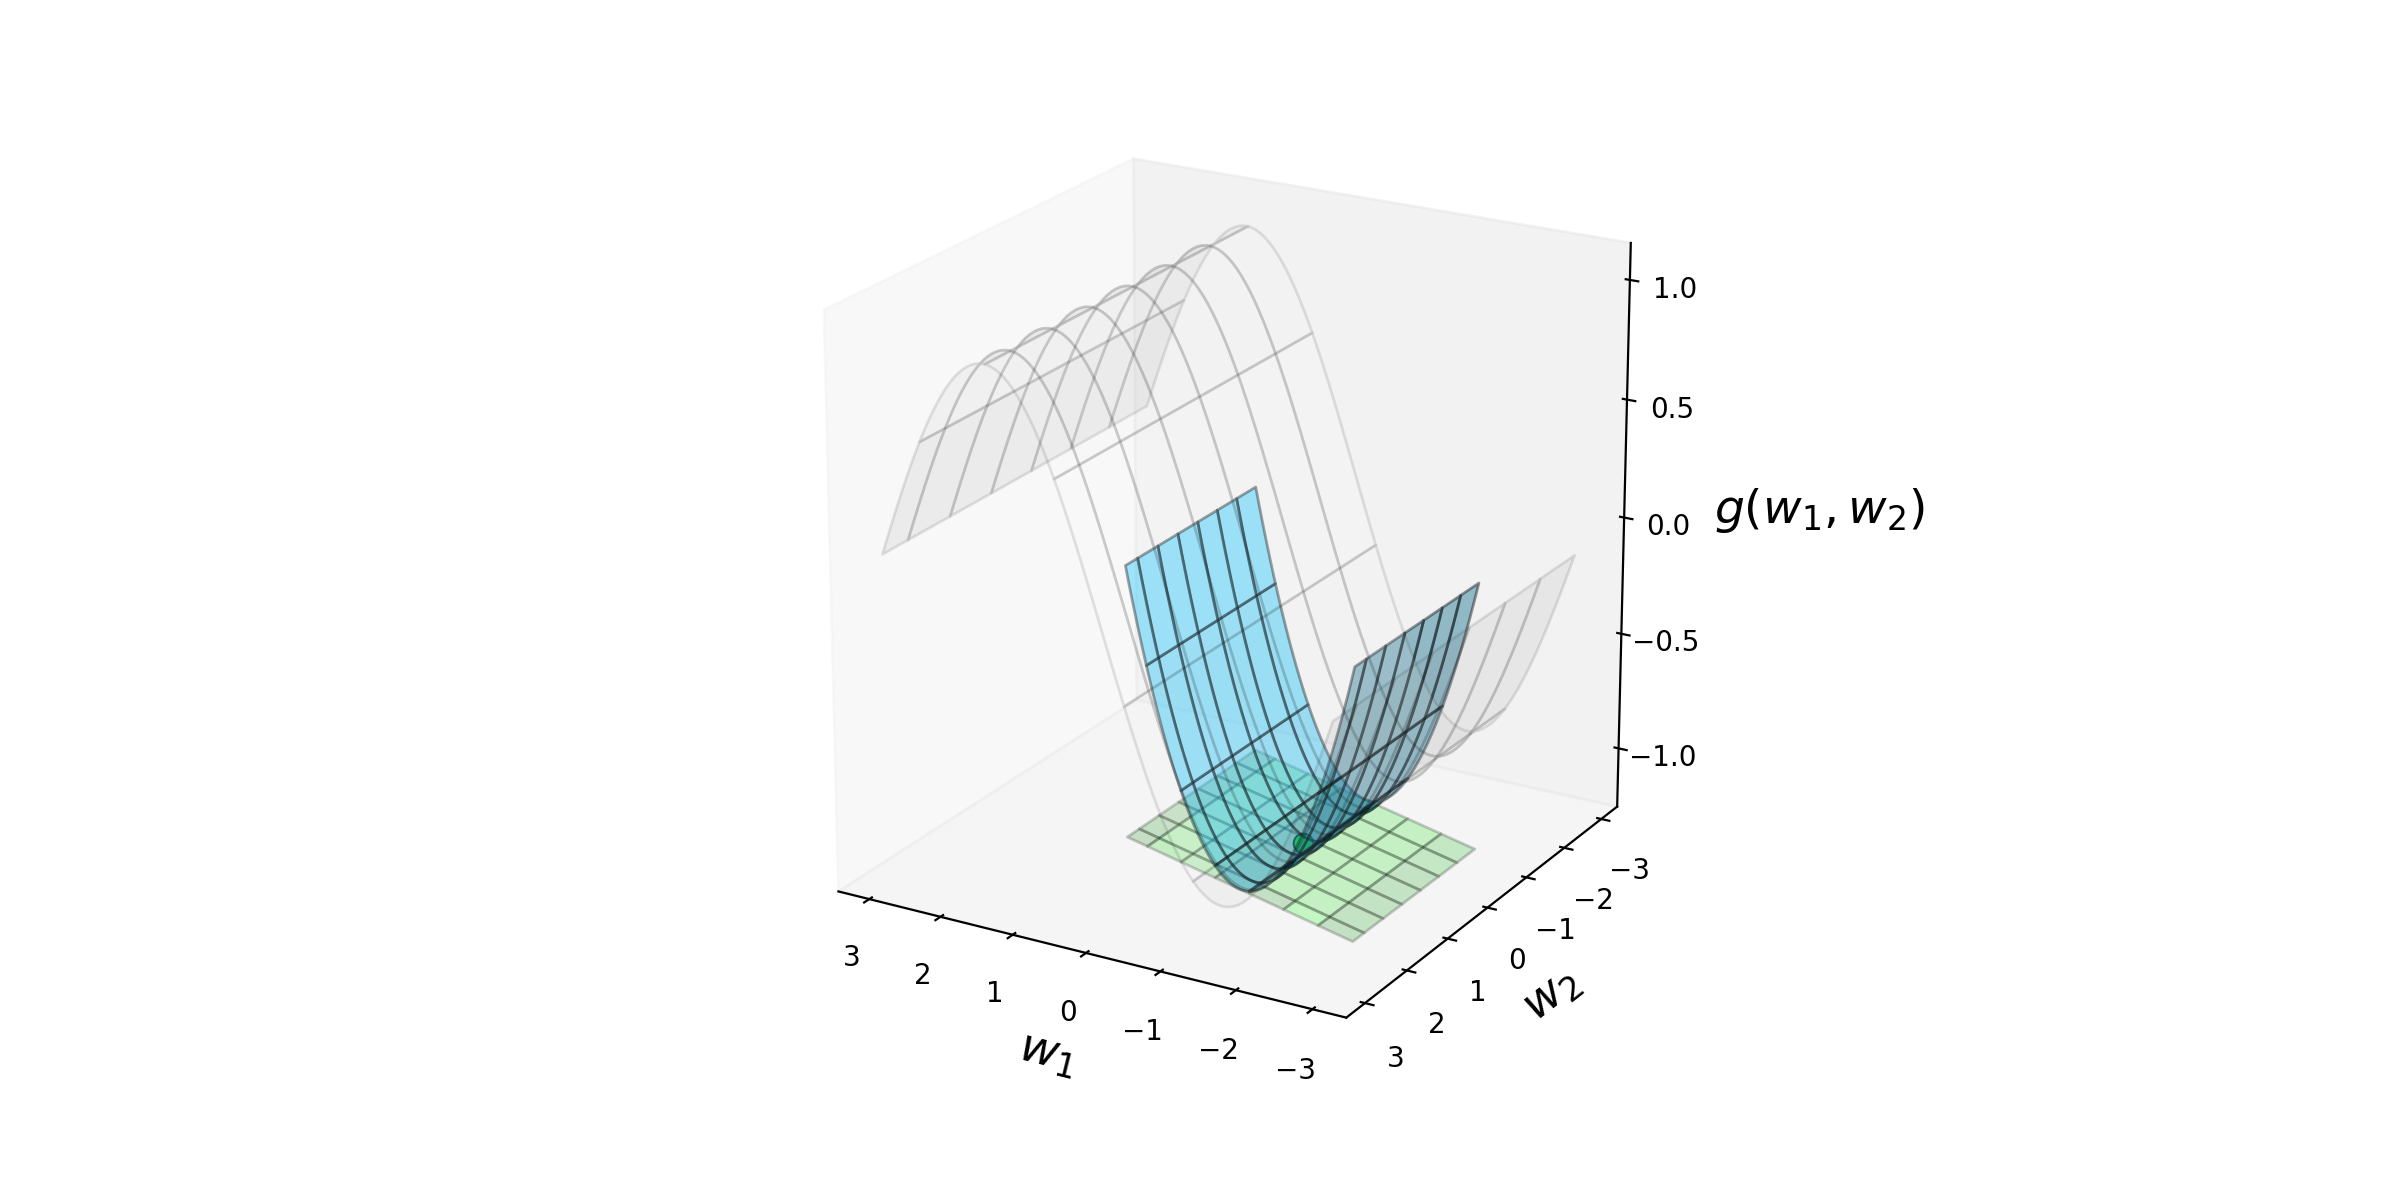

In [7]:
# create a function and point to compute approximation
g = lambda w: np.sin(w[0])
w_val = [-1.5,1]
view = [20,120]

# load in function to examine
viz = callib.taylor3d_viz.visualizer(g = g)

# start examination
viz.draw_it(w_val = w_val,view = view,first_order = True, second_order = True);

#### <span style="color:#a50e3e;">Example 1. </span>  Descent via the minimum of second order taylor series


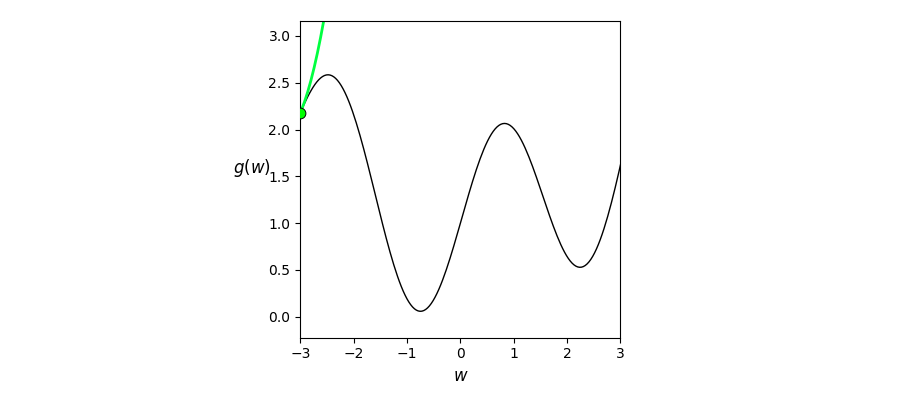
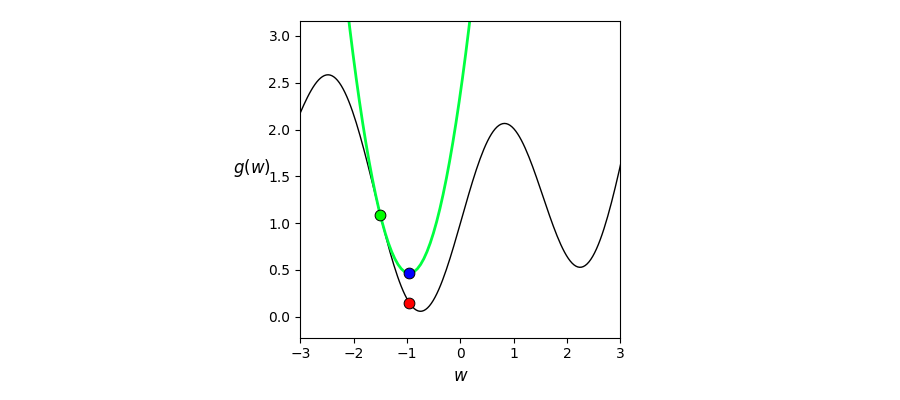
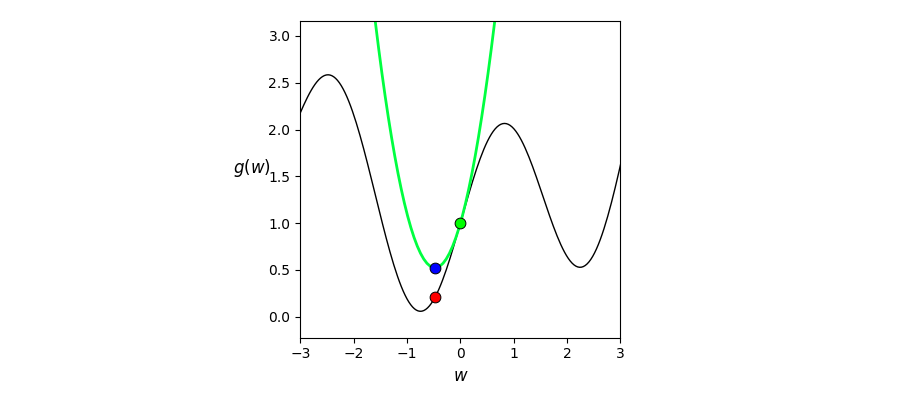
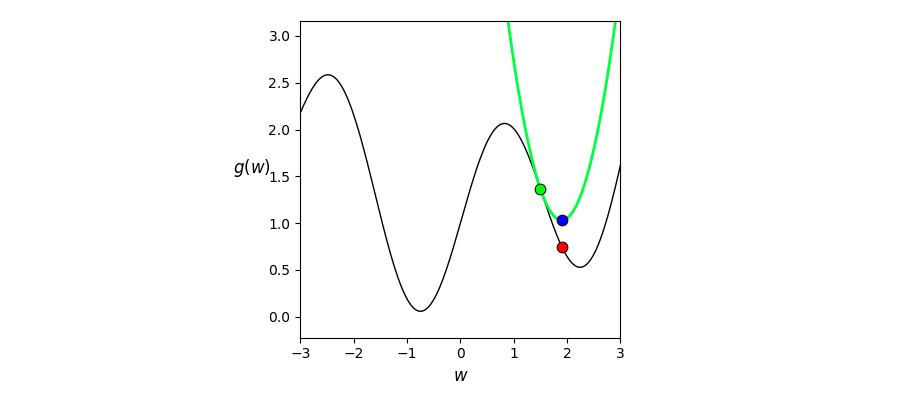
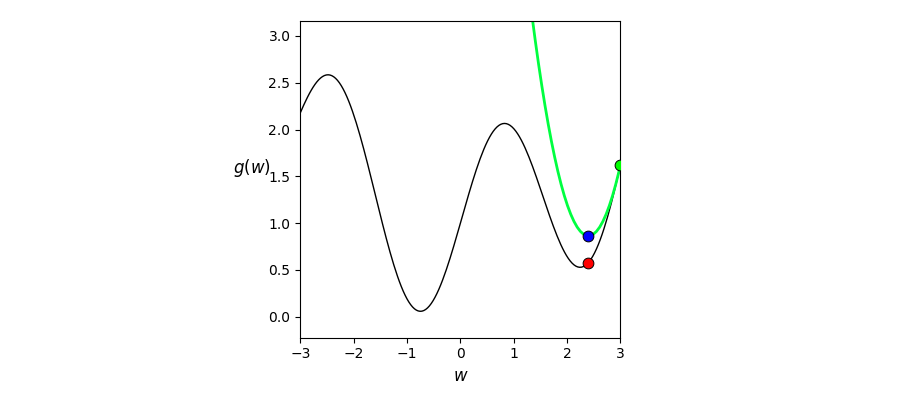

In [8]:
g = lambda w: np.sin(2*w) + 0.1*w**2 + 1
num_frames = 5

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.lipschitz_majorizer.visualizer(g=g);

# run it
demo.animate_it(num_frames = num_frames,max_val = 3)

## 1.2  The method itself

Like gradient descent, Newton's method works by using approximations to a function at each step in order to lower its value. However with
Newton's method a quadratic approximation, again generated via the Taylor series approximation, is used. As illustrated in the top panel
of Figure \ref{fig: Newton's method illustrated}, starting at an initial point $\mathbf{w}^{0}$ Newton's method produces a sequence
of points $\mathbf{w}^{1},\,\mathbf{w}^{2},...$, that minimizes $g$ by repeatedly creating a quadratic approximation to the function,
traveling to a stationary point of this quadratic, and hopping back onto the function. Because Newton's method uses quadratic as opposed
to linear approximations at each step, with a quadratic more closely mimicking the associated function, it is often much more effective
than gradient descent (in the sense that it requires far fewer steps for convergence \cite{luenberger2003linear,boyd2004convex}). However
this reliance on quadratic information makes Newton's method more difficult to use with non-convex functions\footnote{A number of procedures exist that adjust Newton's method at concave
portions of such a function in order to make it more effective for use with non-convex functions. See exercise \ref{exercise:regularizing-newtons-method}
as well as \cite{luenberger2003linear,nocedal2006numerical} for further information.}, since at concave portions of such a function the algorithm can climb
to a maximum, as illustrated in the bottom panel of Figure \ref{fig: Newton's method illustrated}.

<figure>
  <img src= '../../mlrefined_images/math_optimization_images/Fig_2_11.png' width="60%" height="60%" alt=""/>
  <figcaption>   
**Figure 1:** *Newton's method illustrated. To find a minimum of g Newton's method hops down the stationary points of quadratic approximations generated by g's second order Taylor series. (top panel) For convex functions these quadratic approximations are themselves always convex (upward facing) and so their stationary points are minima, and the sequence leads to a minimum of the original function. (bottom panel) For non-convex functions quadratic approximations can be concave or convex depending on where they are constructed, leading the algorithm to possibly converge to a maximum.*  </figcaption> 
</figure>

In [ ]:
PYTHON DEMO GOES HERE

<IPython.core.display.Javascript object>


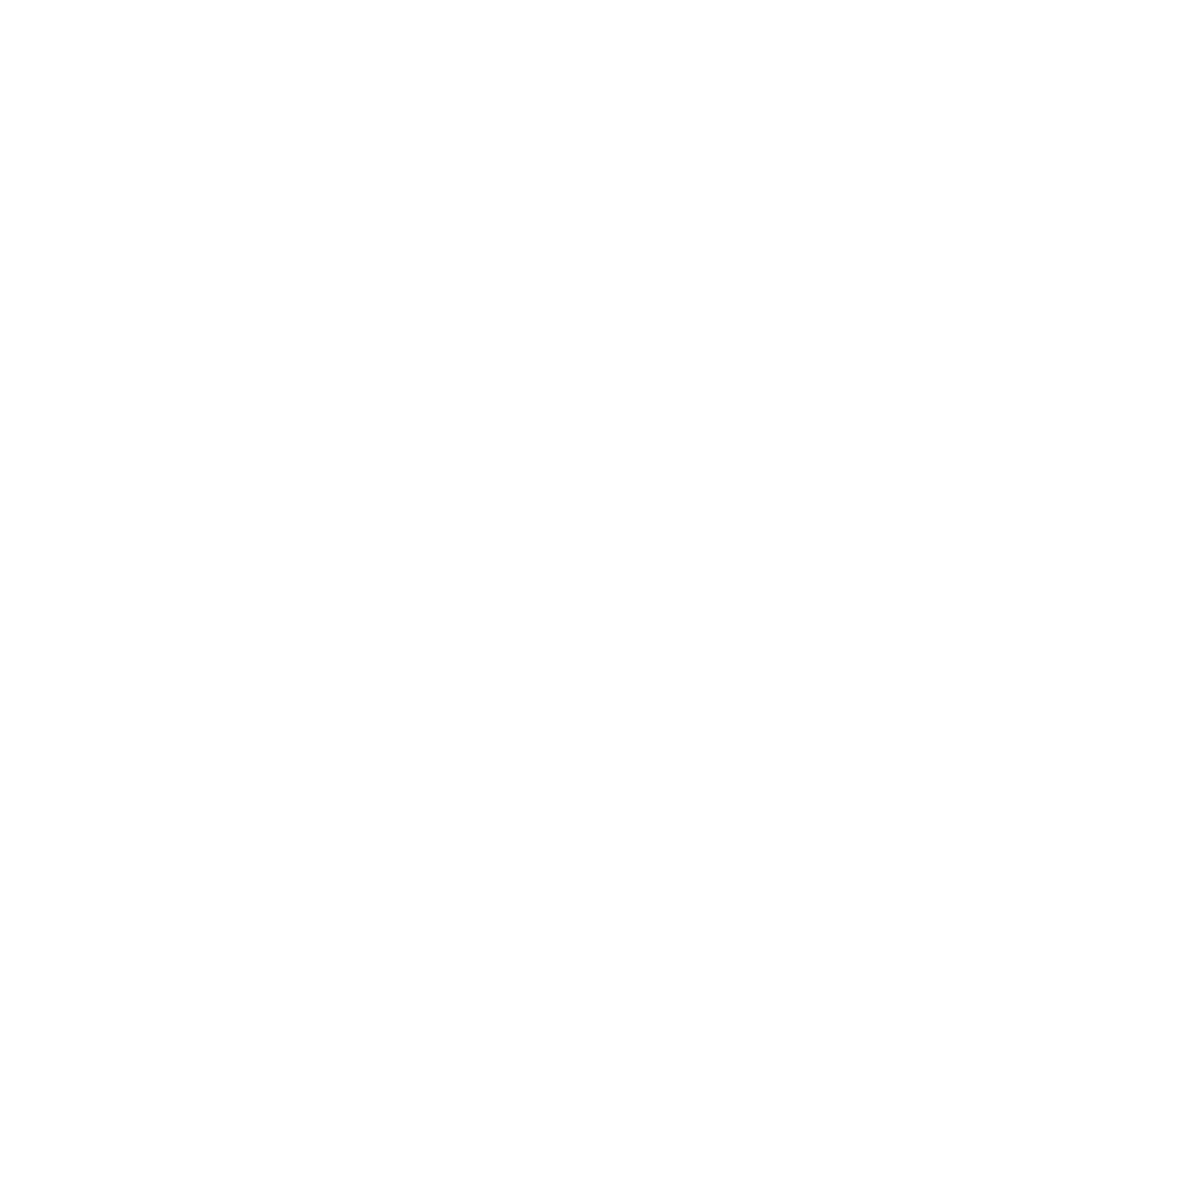


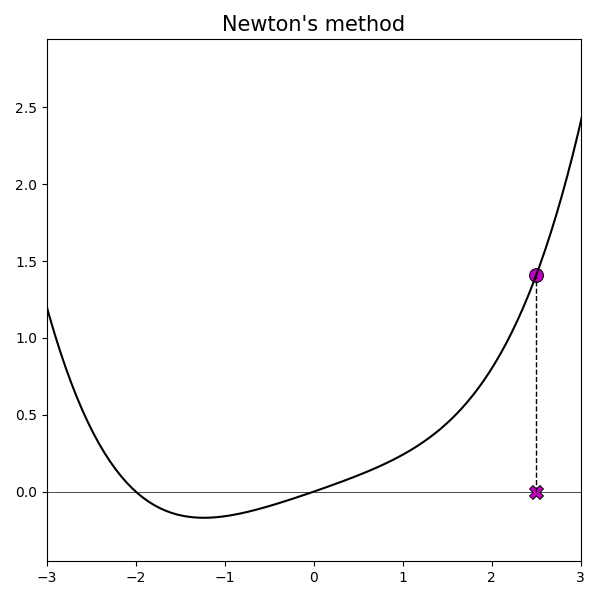
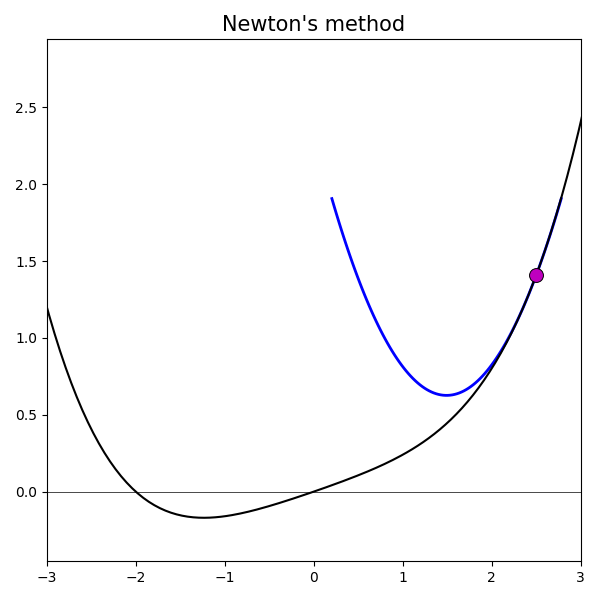
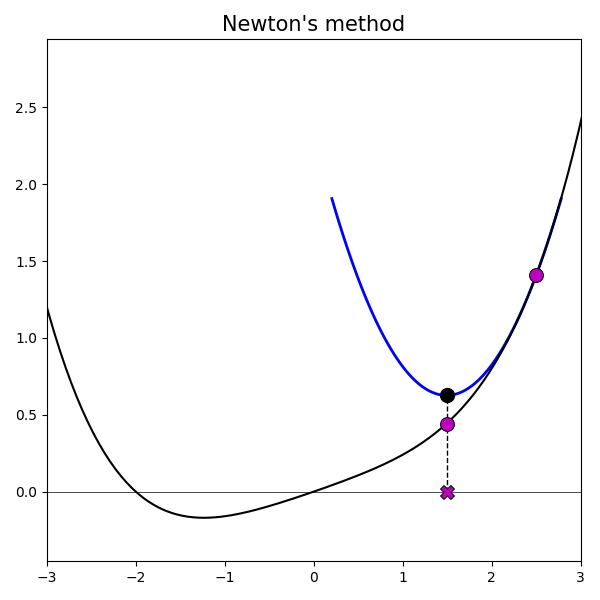
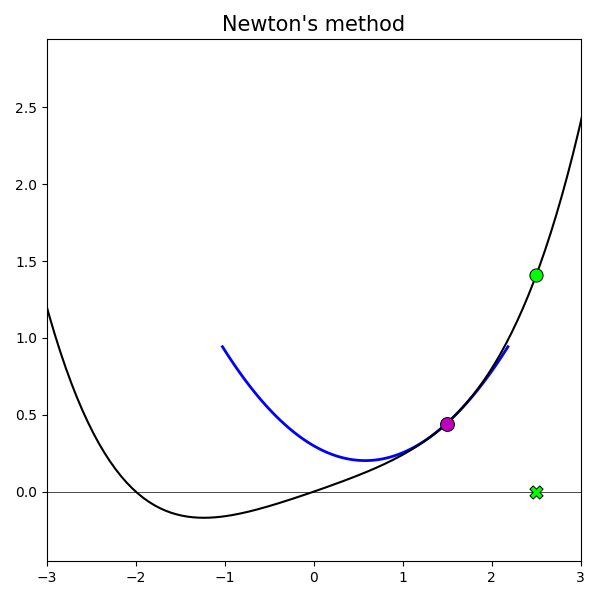
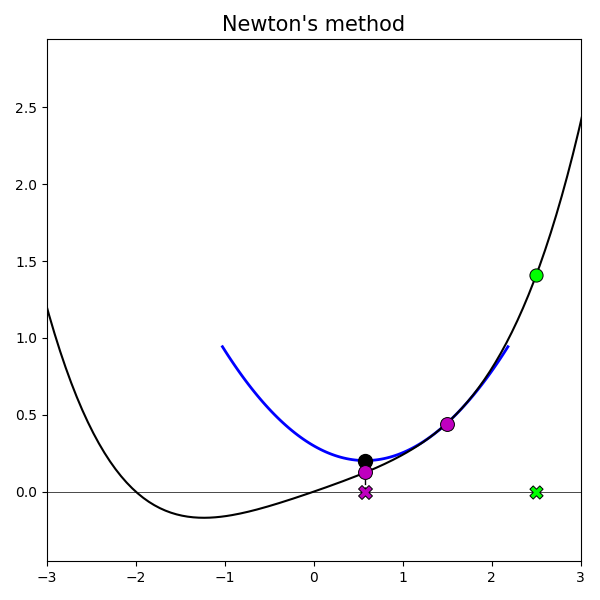
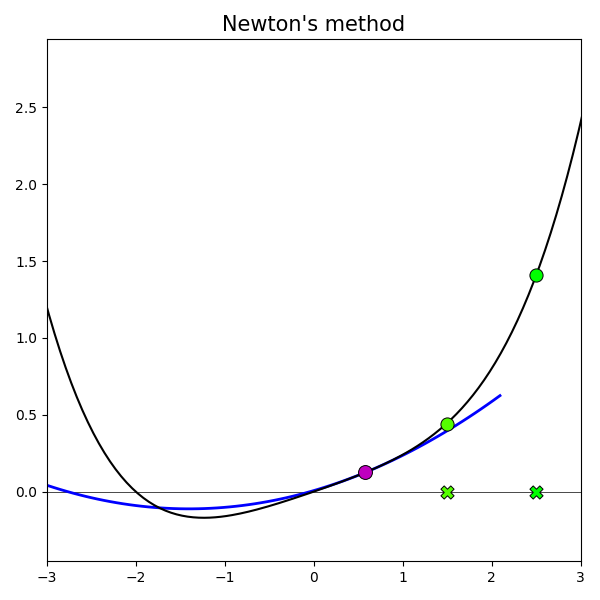
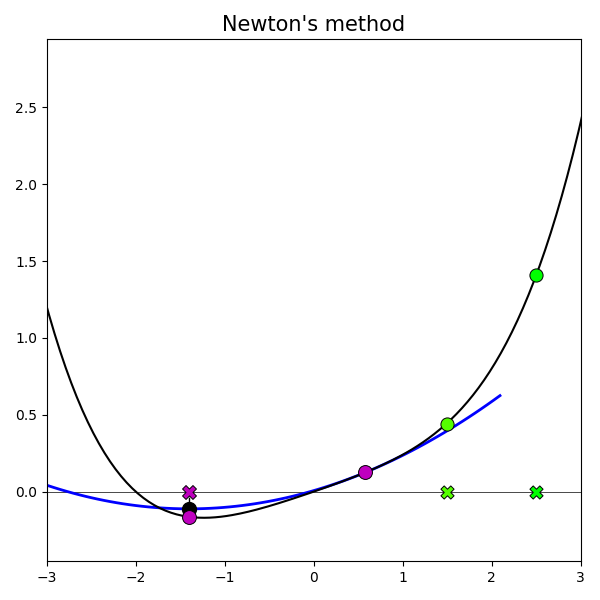
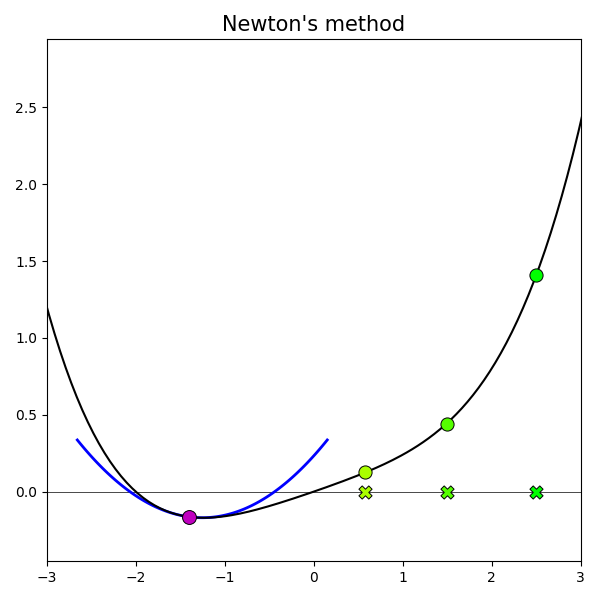
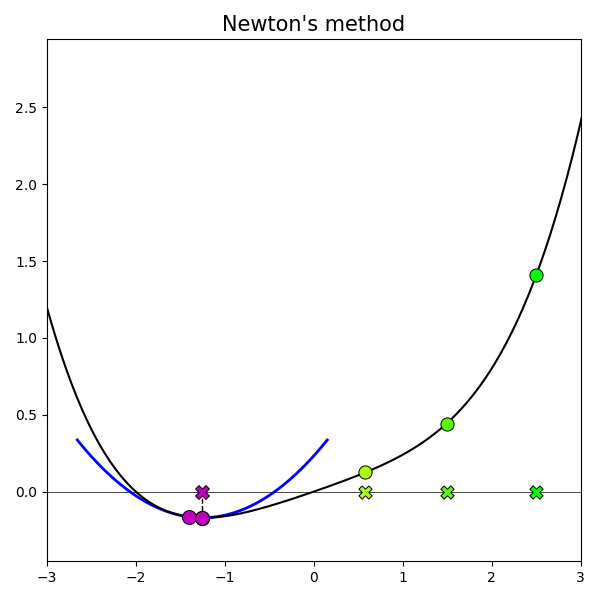
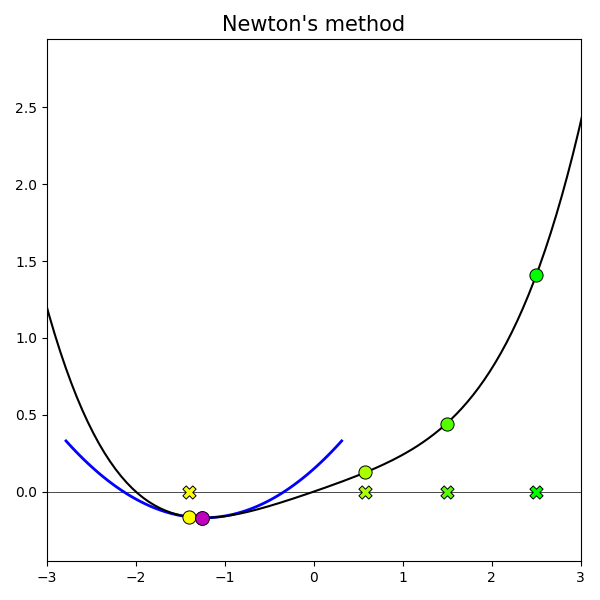
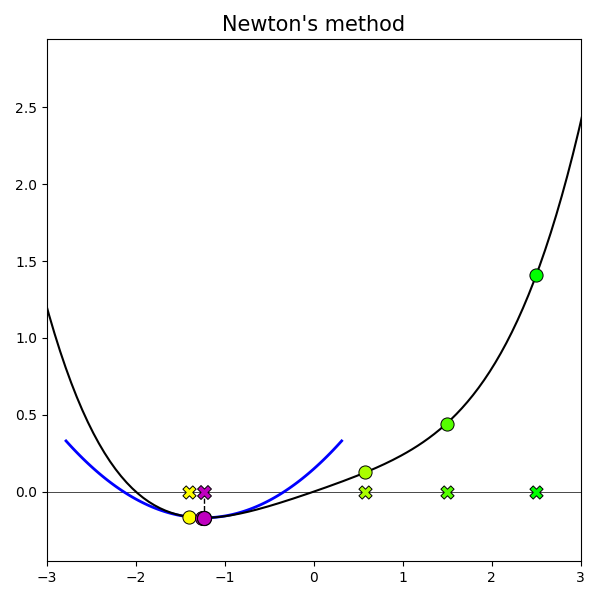
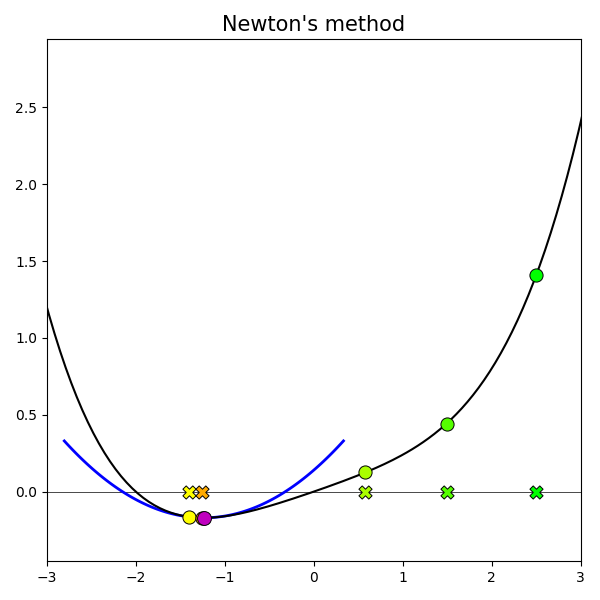
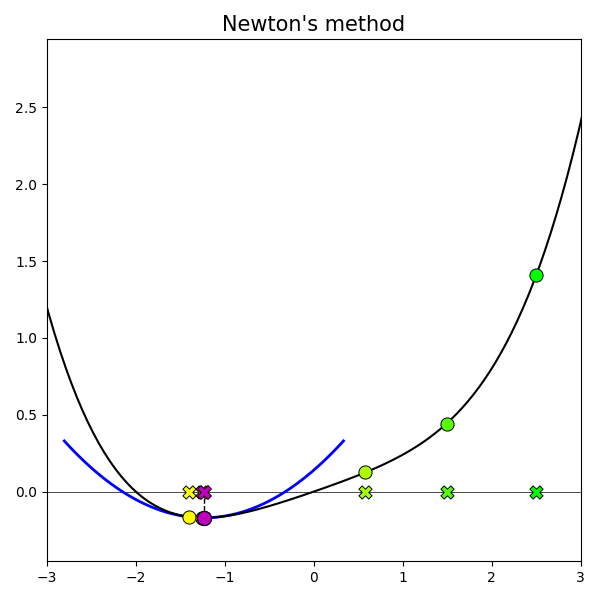
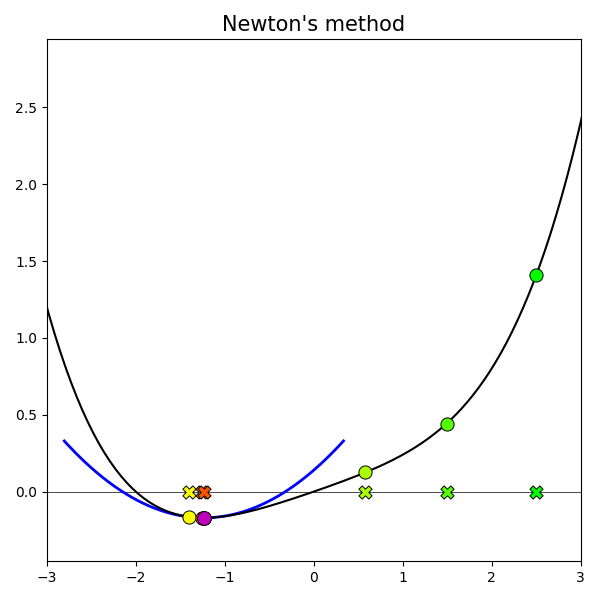
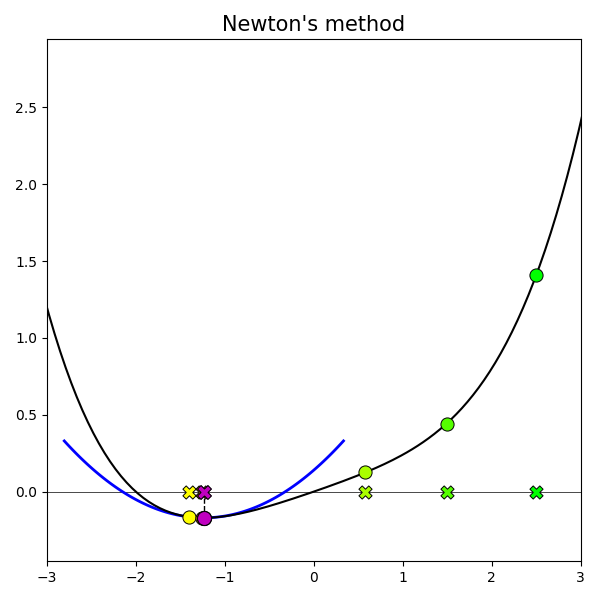
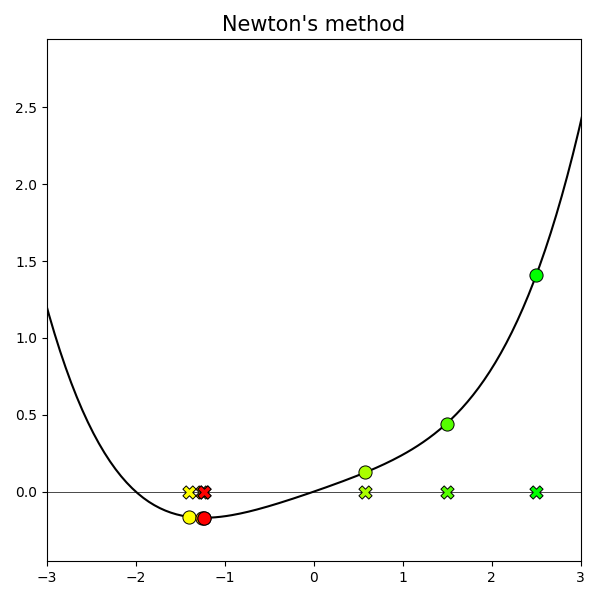

In [5]:
# what function should we play with?  Defined in the next line.
g = lambda w: 1/float(50)*(w**4 + w**2 + 10*w)   # try other functions too!  Like g = lambda w: np.cos(2*w) , g = lambda w: np.sin(5*w) + 0.1*w**2, g = lambda w: np.cos(5*w)*np.sin(w)

# create an instance of the visualizer with this function
demo = optlib.newtons_method_demos.visualizer(g = g)

# run the visualizer for our chosen input function, initial point, and step length alpha
demo.draw_it_newtons(max_its = 10,w_init = 2.5)

#### <span style="color:#a50e3e;">Example 4. </span>  Single-input and multi-input examples

<IPython.core.display.Javascript object>


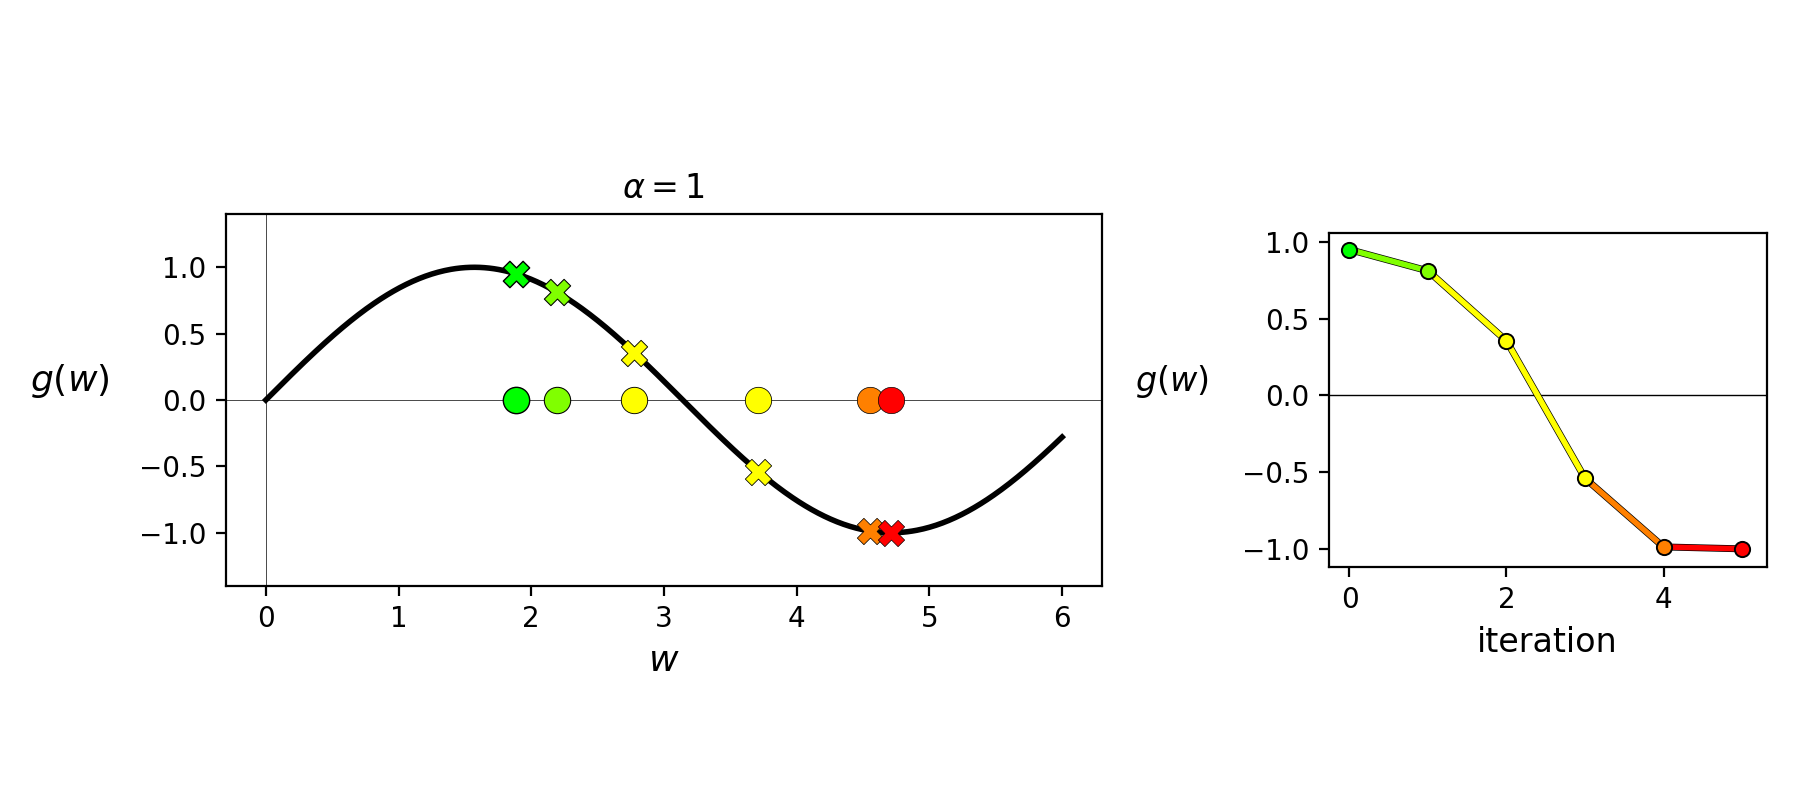

In [9]:
# the Rastrigin function
g = lambda w: np.sin(w)

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.convservative_steplength_demos.visualizer();
w_init = np.pi*0.6; max_its = 5; steplength_vals = [1]; version = 'unnormalized';

demo.run(g,w_init,steplength_vals,max_its,version = version,num_contours = 30,linewidth = 2,xmin = 0, xmax = 6)

<IPython.core.display.Javascript object>


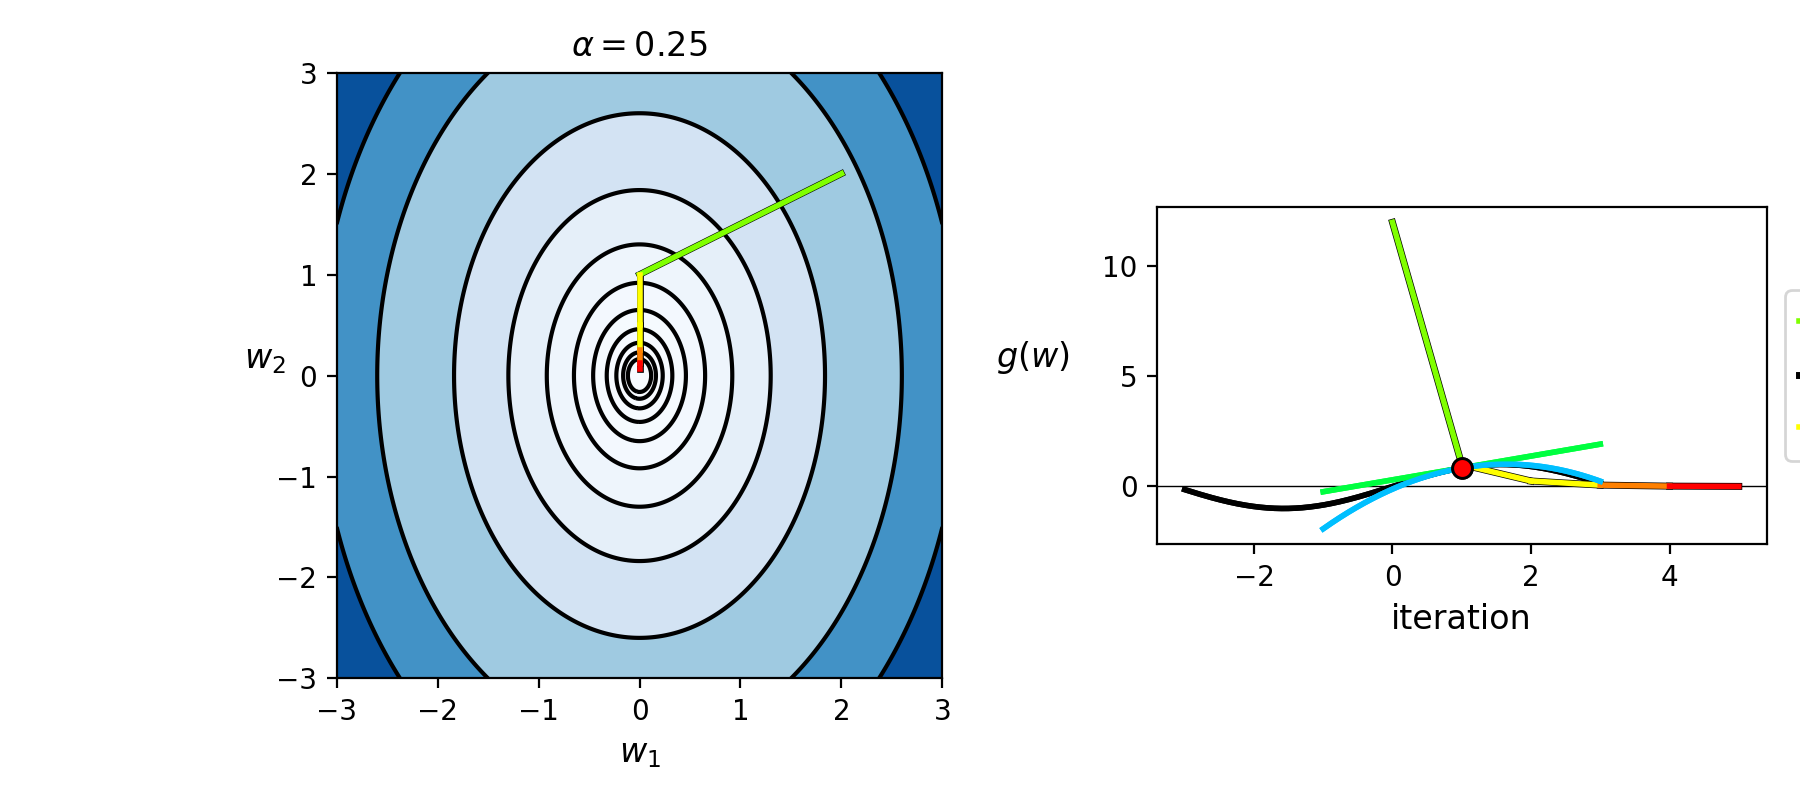

In [10]:
# the Rastrigin function
g = lambda w: 2*w[0]**2 + w[1]**2

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.convservative_steplength_demos.visualizer();
w_init = [2,2]; max_its = 5; steplength_vals = [1/float(4)]; version = 'unnormalized';

demo.run(g,w_init,steplength_vals,max_its,version = version,num_contours = 30,linewidth = 2,xmin = -3, xmax = 3,ymin = -3, ymax = 3)

# Convexifying Newton's method via regularization

<IPython.core.display.Javascript object>


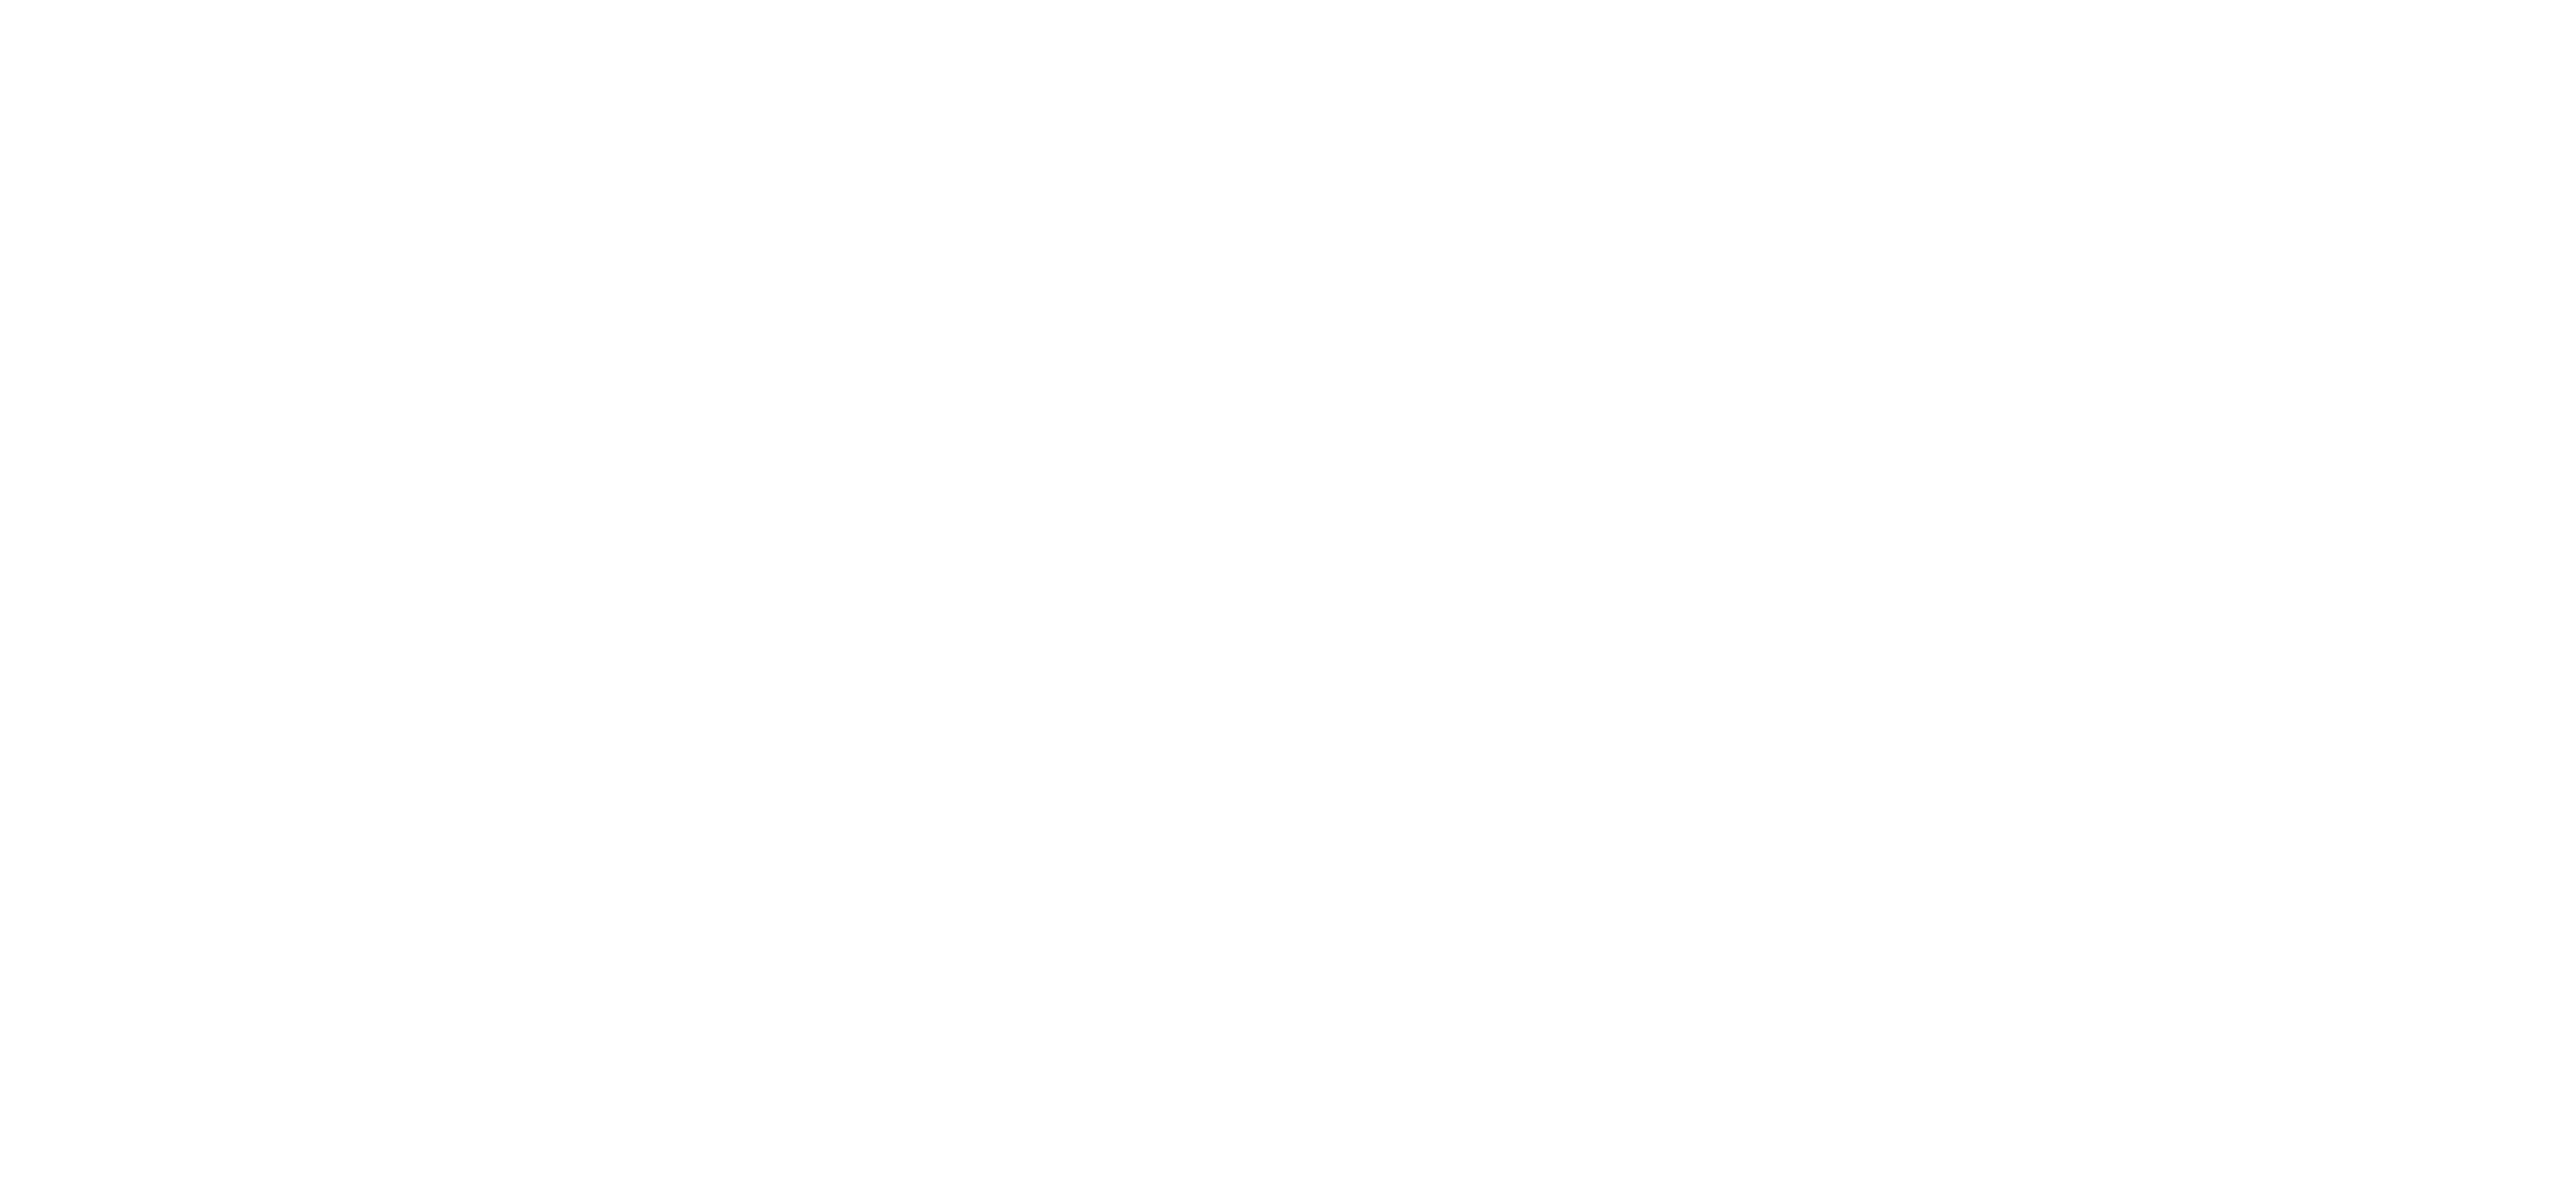


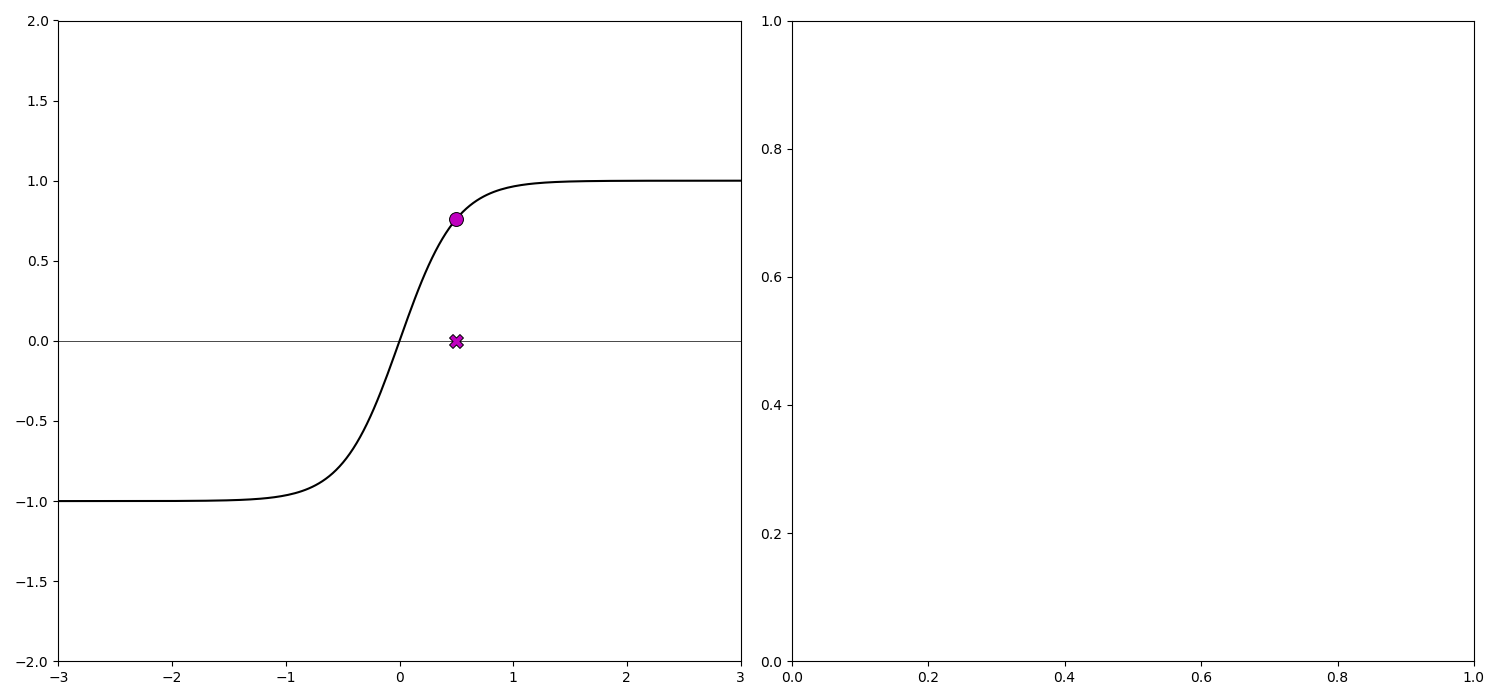
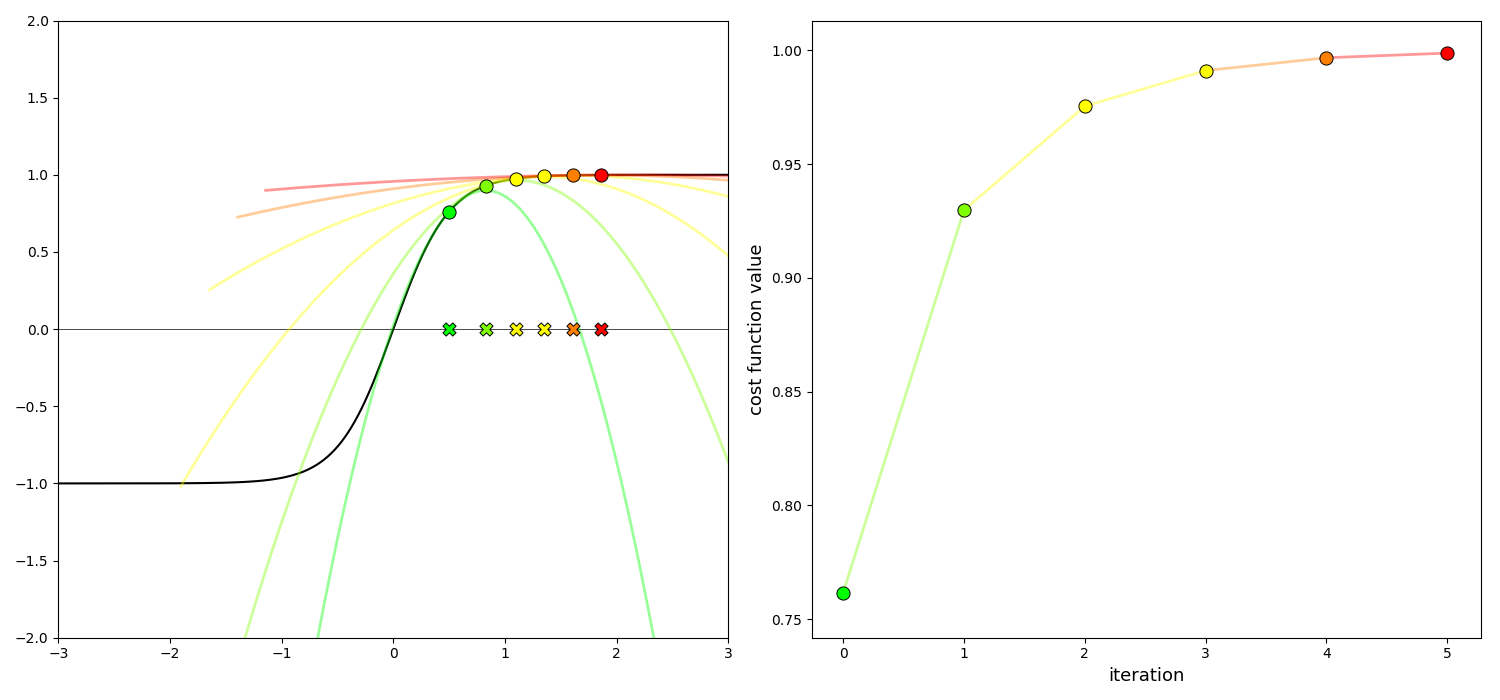
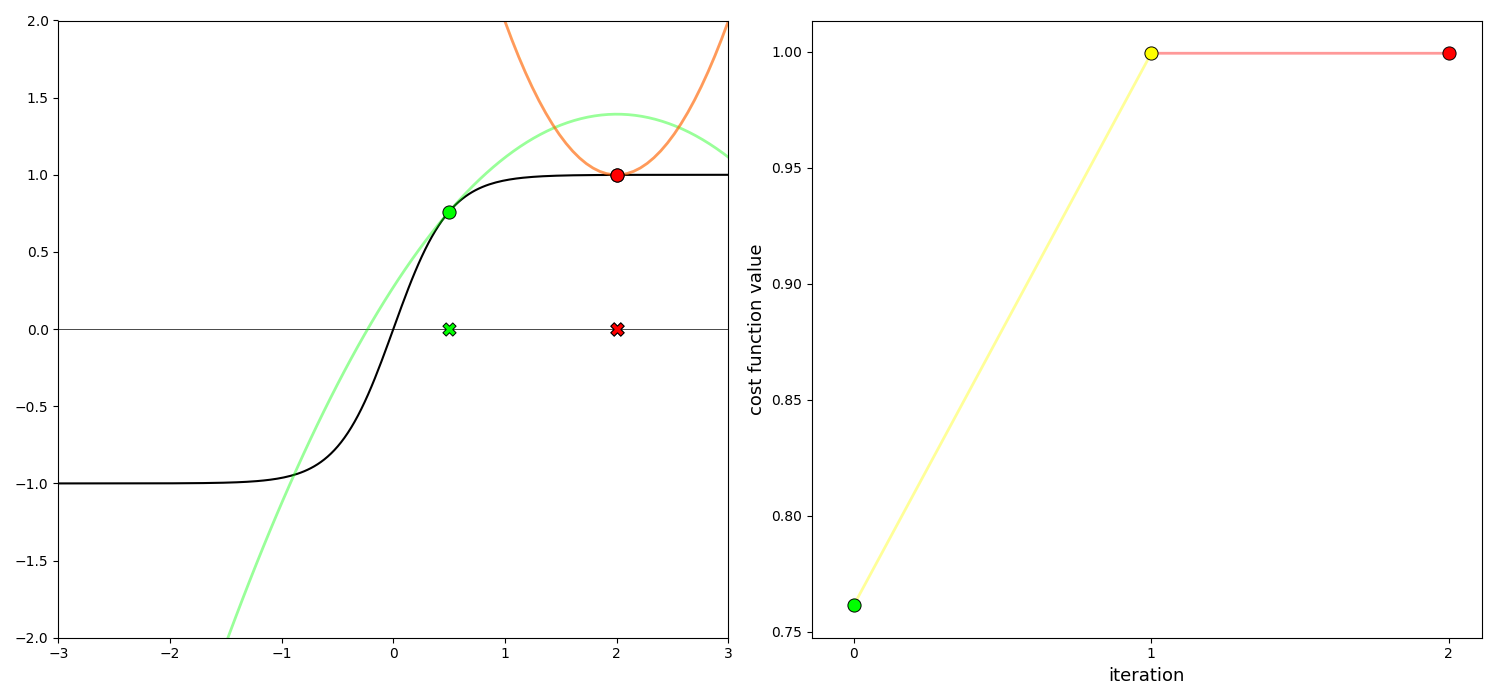
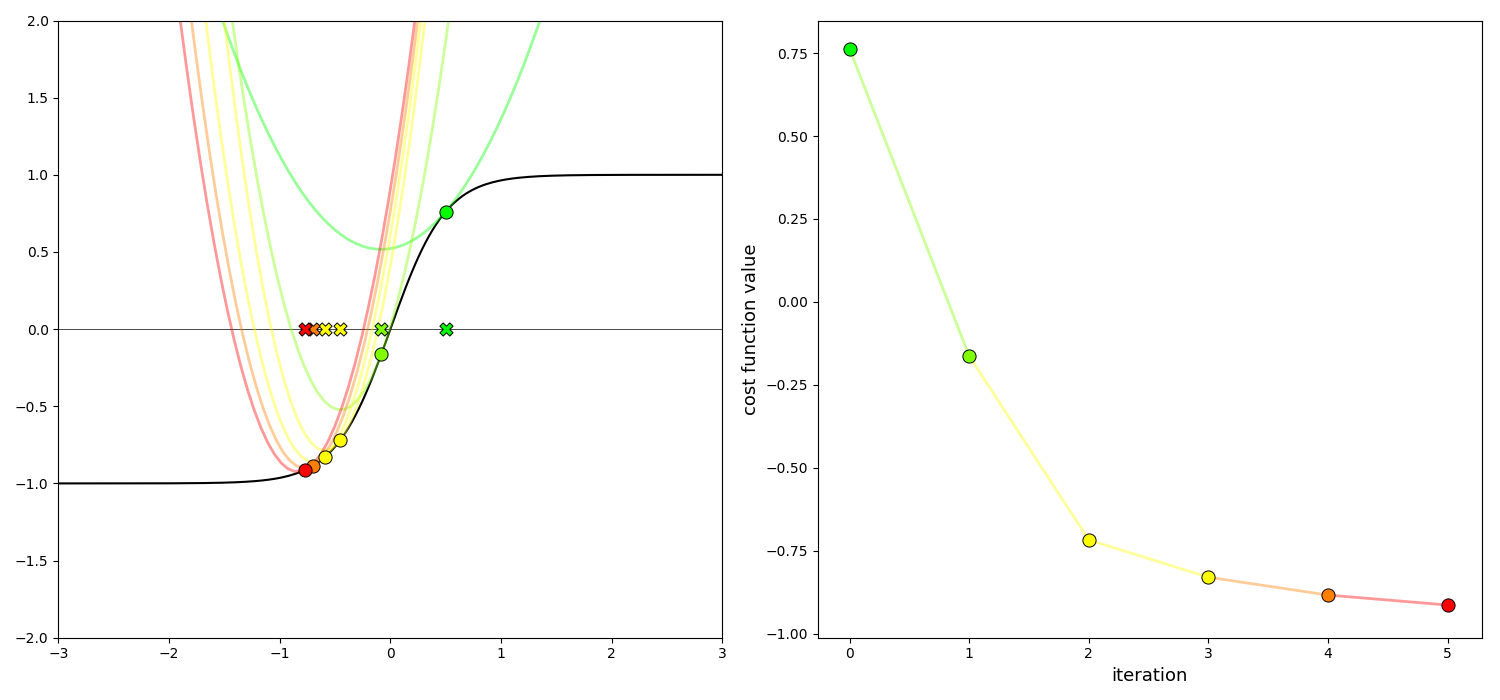

In [3]:
# what function should we play with?  Defined in the next line.
g = lambda w: np.tanh(2*w)

# create an instance of the visualizer with this function
demo = optlib.regularized_newtons_method.visualizer(g = g)

# run the visualizer for our chosen input function, initial point, and step length alpha
beta_range = np.linspace(0,4,3)
demo.draw_it_newtons(w_init = 0.5,max_its = 5,beta_range = beta_range)